In [8]:
import numpy as np
import matplotlib.pyplot as plt

#### y = (1-1/6*x)*exp(x)
#### y' = (5/6 - 1/6*x)*exp(x)
#### y(0) = 1
#### y'(0) = 5/6

In [9]:
x_0, y_0, yp_0  = 0, 1, 5/6

In [10]:
dx, n = 1e-2, 300

In [11]:
def f(x, y, yp_prev):
    def a2(x): return 1
    def a1(x): return -2
    def a0(x): return 1
    return dx/(a2(x) + a1(x)*dx) * (-a0(x)*y + a2(x) / dx * yp_prev)

In [12]:
def solution(x_0 = x_0, y_0=y_0, yp_0=yp_0, f=f):
    F = np.zeros((n, 3))
    F[0] = [x_0, y_0, yp_0]
    for i in range(1, n):
        x, y, yp = F[i-1]

        k1       = f(x, y, yp)
        k2       = f(x + dx / 2, y + k1 * dx / 2, yp)
        k3       = f(x + dx / 2, y + k2 * dx / 2, yp)
        k4       = f(x + dx, y + k3 * dx, yp)

        dy        = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yn       = y + dx * dy

        F[i]     = [x + dx, yn, dy]

    return F

In [13]:
ans = solution(x_0, y_0, yp_0, f)

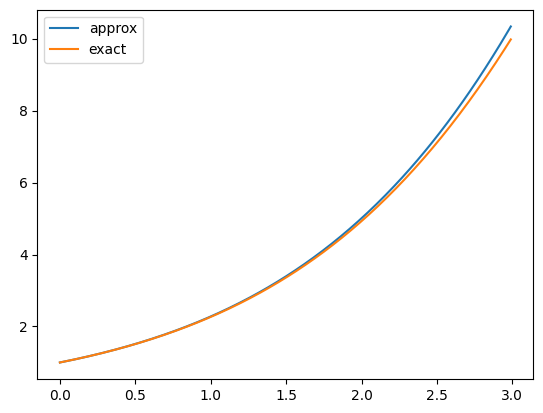

In [14]:
space = np.arange(x_0, dx * n, dx)
plt.plot(ans[:, 0], ans[:, 1], label='approx')
plt.plot(space, (1-1/6*space)*np.exp(space), label='exact')
plt.legend()
plt.show()